# Modelo de péndulos
Pendulos dobles
Clase - Semana 10


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

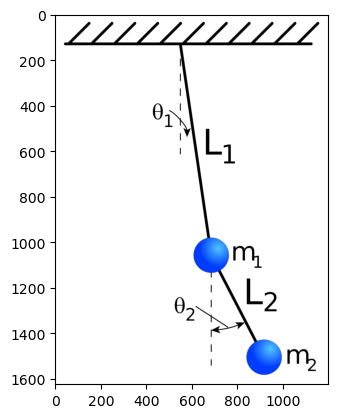

In [6]:
image = mpimg.imread("../images/doub_pen.png")
plt.imshow(image)
plt.show()

In [7]:
# Librerías de simulación
import numpy as np
import sympy as smp # Nos permite hacer calculos simbólicos
from scipy.integrate import odeint

# Librerías de ploteo
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [12]:
# Ejemplo de sympy:
x = smp.Symbol('x')
y = smp.Symbol('y')
 
z = (x + y) + (x-2*y)
print("El valor de z: \n" + str(z))

El valor de z: 
2*x - y


# Modelos en 2 dimensiones

In [13]:
# Define all appropriate symbols using sympy.
t, g = smp.symbols('t g') # Tiempo y gravedad
m1, m2 = smp.symbols('m1 m2') # Masas 
L1, L2 = smp.symbols('L1, L2') # Longitudes

Definimos las funciones para los ángulos $\theta_1$(t), $\theta_2$(t)

In [17]:
the1, the2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)

Lo importante en Sympy es decirle al programa de qué depende la función simbólica definida

In [18]:
the1 = the1(t)
the2 = the2(t)

In [19]:
the1

\theta_1(t)

In [20]:
the2

\theta_2(t)

Sympy nos permite calcular derivadas parciales simbolicamente:

In [22]:
# Derivadas de primer orden
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)

# Derivadas de segundo orden
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)

In [24]:
the2_d

Derivative(\theta_2(t), t)

In [23]:
the1_dd

Derivative(\theta_1(t), (t, 2))

Ahora definimos las coordenadas de las masas m1 y m2:  ($x_1$, $y_1$), ($x_2$, $y_2$)  respectivamente.

In [26]:
x1 = L1*smp.sin(the1)
y1 = -L1*smp.cos(the1)
x2 = L1*smp.sin(the1)+L2*smp.sin(the2)
y2 = -L1*smp.cos(the1)-L2*smp.cos(the2)

In [32]:
x1

L1*sin(\theta_1(t))

In [27]:
x2

L1*sin(\theta_1(t)) + L2*sin(\theta_2(t))

In [28]:
y1

-L1*cos(\theta_1(t))

In [33]:
y2

-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t))

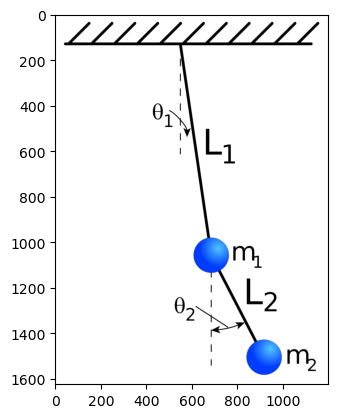

In [25]:
image = mpimg.imread("../images/doub_pen.png")
plt.imshow(image)
plt.show()

Obtenemos el Langrangiano, con ayuda de las energías cinética y potencial

In [29]:
# Energía cinética
T1 = 1/2 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = 1/2 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T = T1+T2

In [34]:
x1

L1*sin(\theta_1(t))

In [30]:
T1

0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2)

In [35]:
x2

L1*sin(\theta_1(t)) + L2*sin(\theta_2(t))

In [31]:
T2

0.5*m2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

In [36]:
# EnergiaPotential
V1 = m1*g*y1
V2 = m2*g*y2
V = V1 + V2

In [37]:
V1

-L1*g*m1*cos(\theta_1(t))

In [39]:
V2

g*m2*(-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t)))

In [40]:
# Lagrangiano
L = T-V

In [41]:
L

L1*g*m1*cos(\theta_1(t)) - g*m2*(-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t))) + 0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

Del comportamiento físico de un sistema dinámico, sabemos que está governado por las ecuaciones de Lagrange:


$$\frac{\partial L}{\partial \theta_1} - \frac{d}{dt}\frac{\partial L}{\partial {\theta_1}} = 0$$
$$\frac{\partial L}{\partial \theta_2} - \frac{d}{dt}\frac{\partial L}{\partial {\theta_2}} = 0$$

# Las ecuaciones de Lagrange se puede resolver en Fenics, por simplicidad podemos hacer artificios que nos dejen con una EDO (que depende sólo de 1 variable)

In [44]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t).simplify()
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t).simplify()

In [43]:
LE1

-L1*g*m1*sin(\theta_1(t)) - L1*g*m2*sin(\theta_1(t)) - L1*(L1*m1*Derivative(\theta_1(t), (t, 2)) + L1*m2*Derivative(\theta_1(t), (t, 2)) - L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + L2*m2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2))) + 0.5*m2*(2*L1*(L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))*cos(\theta_1(t))*Derivative(\theta_1(t), t) - 2*L1*(L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*sin(\theta_1(t))*Derivative(\theta_1(t), t))

Sympy puede resolver ecuaciones simbólicas, por defecto las iguala a cero:

In [45]:
# LE1 = 0
# LE2 = 0
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd),
                simplify=False, rational=False)

In [ ]:
# El sistema de EDP que depende de theta y t, lo pasamos con un artificion a una EDO que sólo dependa del tiempo.

Utilizaremos el siguiente cambio de variable:

1. Define $z_1 = d\theta_1/dt$ y $z_2=d\theta_2/dt$
2. Luego tendremos:
 $dz_1/dt = d^2\theta_1/dt^2$ and $dz_2/dt = d^2\theta_2/dt^2$

Esto nos llevará a obtener un sistema de 4 ecuaciones ordinarias:

* $d z_1/dt = ...$
* $d\theta_1/dt = z_1$
* $d z_2/dt = ...$
* $d\theta_2/dt = z_2$

Usando `smp.lambdify` pasamos de expresiones simbólicas a numéricas

In [51]:
# Función numérica para dz1/dt
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the1_dd])
# Función numérica para dz2/dt
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the2_dd])
# Función numérica para dtheta1/dt
dthe1dt_f = smp.lambdify(the1_d, the1_d)
# Función numérica para dtheta2/dt
dthe2dt_f = smp.lambdify(the2_d, the2_d)

Definamos un nuevo vector que nos represente los parámetros que aparecen en la nueva EDO:

$\vec{S} = (\theta_1, z_1, \theta_2, z_2)$.

Expresaremos la EDO en función de $\vec{S}$ y $t$, y también su $d\vec{S}/dt$. Para el útlimo necesitamos crear nosotros mismos la función derivada.

In [53]:
def dSdt(S, t, g, m1, m2, L1, L2):
    the1, z1, the2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
    ]

# Usaremos la libreria ODEINT para resolver el sistema de ecuaciones dinámico en una malla.
Sin embargo esta librería sólo puede resolver ecuaciones ordinarias (no parciales)

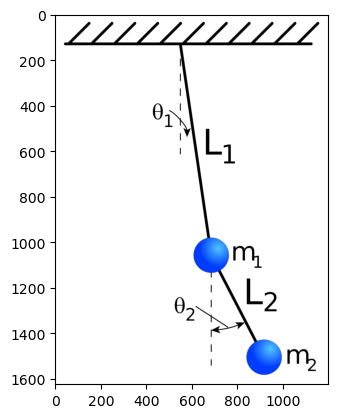

In [48]:
image = mpimg.imread("../images/doub_pen.png")
plt.imshow(image)
plt.show()

In [54]:
t = np.linspace(0, 40, 1001) # malla 1-D de tiempo
g = 9.81 
m1 = 2
m2 = 1
L1 = 2
L2 = 1
ans = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g, m1, m2, L1, L2))

# Resolvemos y calculamos los valores de S(t) para la malla 1-D de puntos

$\vec{S} = (\theta_1, z_1, \theta_2, z_2)$.

In [55]:
ans

array([[ 1.        , -3.        , -1.        ,  5.        ],
       [ 0.87413906, -3.31025173, -0.78277685,  5.91440903],
       [ 0.73333306, -3.75998052, -0.52139856,  7.24155048],
       ...,
       [-2.13759318, -1.41988655, 42.27212899,  2.0224495 ],
       [-2.19090541, -1.24705711, 42.35327744,  2.041621  ],
       [-2.23745698, -1.08160654, 42.4360194 ,  2.10261664]])

De la matriz hallada podemos extraer $\theta_1(t)$ y $\theta_2(t)$  

In [56]:
the1 = ans.T[0]
the2 = ans.T[2]

In [57]:
the1

array([ 1.        ,  0.87413906,  0.73333306, ..., -2.13759318,
       -2.19090541, -2.23745698])

In [58]:
the2

array([-1.        , -0.78277685, -0.52139856, ..., 42.27212899,
       42.35327744, 42.4360194 ])

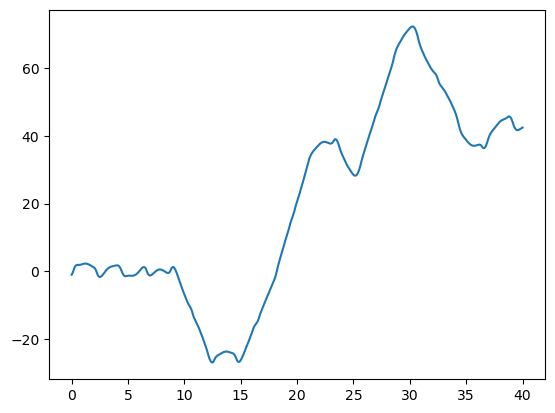

In [60]:
plt.plot(t, the2)

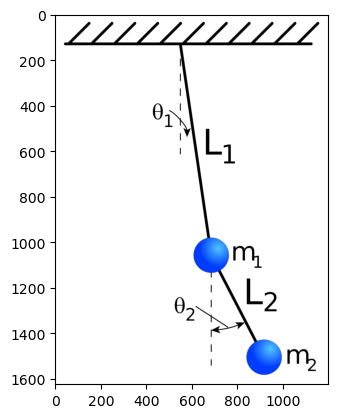

In [63]:
image = mpimg.imread("../images/doub_pen.png")
plt.imshow(image)
plt.show()

Una vez hallados  $\theta_1$ y $\theta_2$ podemos calcular las posiciones (x,y) de las 2 masas:

In [61]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
    return (L1*np.sin(the1),
            -L1*np.cos(the1),
            L1*np.sin(the1) + L2*np.sin(the2),
            -L1*np.cos(the1) - L2*np.cos(the2))

# Para el intervalo de 0 a 40s podemos hallar todas las posiciones
x1, y1, x2, y2 = get_x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)

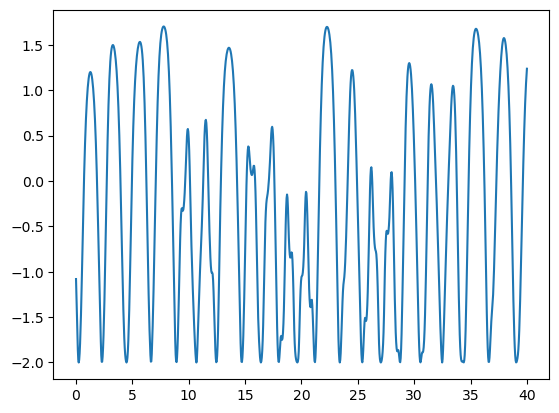

In [66]:
plt.plot(t, y1)

Finalmente, podemos hacer una animación

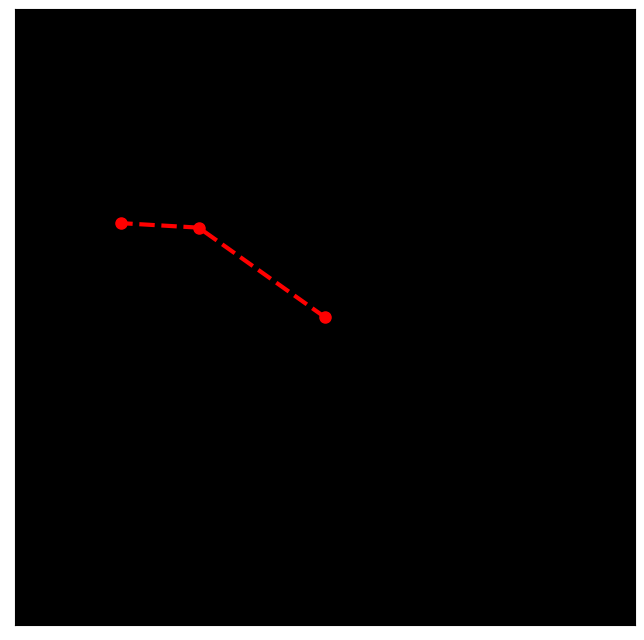

In [67]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])  
ax.get_yaxis().set_ticks([])    
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow',fps=25)